**Two-way intersection**

This section simulates a T-shaped two-way intersection consisting of an eastbound queue and a northbound queue. Each is controlled by a traffic light represented by a periodic on/off sequence.

*Traffic lights*

In [1]:
from TrafficLight import SimpleTrafficLight

e_controller = SimpleTrafficLight()
e_controller.initialize(T=60, time_delay=0)

n_controller = SimpleTrafficLight()
n_controller.initialize(T=60, time_delay=30)

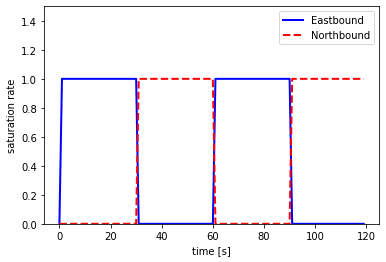

In [2]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0., 120., 1)
e_saturation_rate = [e_controller.saturation_rate(sample) for sample in t]
n_saturation_rate = [n_controller.saturation_rate(sample) for sample in t]

e_line, = plt.plot(t, e_saturation_rate, 'b-', linewidth=2)
e_line.set_label('Eastbound')
n_line, = plt.plot(t, n_saturation_rate, 'r--', linewidth=2)
n_line.set_label('Northbound')

plt.xlabel('time [s]')
plt.ylabel('saturation rate')
plt.ylim([0,1.5])
plt.legend()
plt.show()

*M/M/1 queue*

In [3]:
import MM1Queue

e_queue = MM1Queue.QueueSimulator()
e_queue.initialize(avg_arrival_time=8, avg_departure_time=2)


n_queue = MM1Queue.QueueSimulator()
n_queue.initialize(avg_arrival_time=15, avg_departure_time=2)

In [4]:
delta_t = 0.25
e_queue_length = [0]
e_arrivals = [0]
e_departures = [0]
n_queue_length = [0]
n_arrivals = [0]
n_departures = [0]

while e_queue.time < 600:
    e_queue.run_event(delta_t=delta_t, saturation_rate=e_controller.saturation_rate(e_queue.time))
    e_queue_length += [e_queue.queue.queue_length]
    e_arrivals += [e_queue.arrivals]
    e_departures += [e_queue.departures]
    
    n_queue.run_event(delta_t=delta_t, saturation_rate=n_controller.saturation_rate(n_queue.time))
    n_queue_length += [n_queue.queue.queue_length]
    n_arrivals += [n_queue.arrivals]
    n_departures += [n_queue.departures]

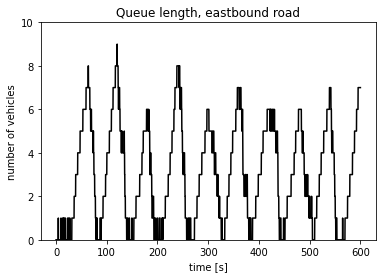

In [5]:
plt.plot(np.arange(0.,600.+delta_t,delta_t), e_queue_length, 'black')
plt.ylim([0,10])
plt.xlabel('time [s]')
plt.ylabel('number of vehicles')
plt.title('Queue length, eastbound road')
plt.show()

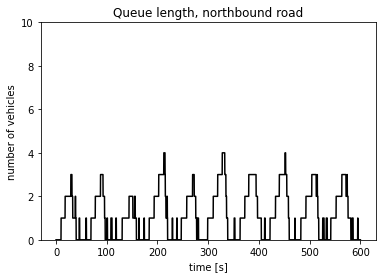

In [6]:
plt.plot(np.arange(0.,600.+delta_t,delta_t), n_queue_length, 'black')
plt.ylim([0,10])
plt.xlabel('time [s]')
plt.ylabel('number of vehicles')
plt.title('Queue length, northbound road')
plt.show()

In [7]:
print('Average wait time, eastbound road: {} s'.format(e_queue.avg_wait_time()))
print('Average wait time, northbound road: {} s'.format(n_queue.avg_wait_time()))

Average wait time, eastbound road: 10.882530120481928 s
Average wait time, northbound road: 5.508196721311475 s
